In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv(data)

In [4]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [5]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


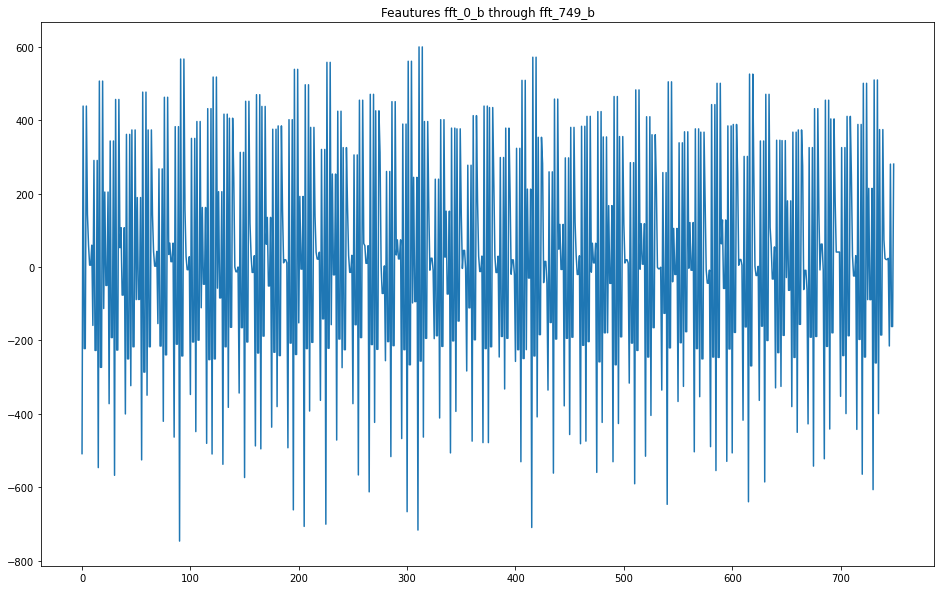

In [6]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()


In [7]:
data['label'].value_counts()


NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [8]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [38]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [41]:
X_train.shape, X_test.shape

((1492, 2548), (640, 2548))

# Simple RNN

In [35]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,GRU,SimpleRNN,Conv1D,MaxPooling1D,Flatten , Dropout, BatchNormalization

In [43]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
rnn = tf.keras.layers.SimpleRNN(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(rnn)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

RNN_model = tf.keras.Model(inputs=inputs, outputs=outputs)
RNN_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 2548, 256)         66048     
                                                                 
 flatten_3 (Flatten)         (None, 652288)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,022,915
Trainable params: 2,022,915
Non-trainable params: 0
_________________________________________________

In [46]:
RNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
history_RNN = RNN_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 80s 2s/step - loss: 19.6482 - accuracy: 0.8324 - val_loss: 15.1900 - val_accuracy: 0.8930
Epoch 2/50
38/38 [==============================] - 79s 2s/step - loss: 10.3295 - accuracy: 0.9246 - val_loss: 14.1293 - val_accuracy: 0.8428
Epoch 3/50
38/38 [==============================] - 108s 3s/step - loss: 10.5190 - accuracy: 0.9279 - val_loss: 17.5099 - val_accuracy: 0.9130
Epoch 4/50
38/38 [==============================] - 78s 2s/step - loss: 4.4588 - accuracy: 0.9606 - val_loss: 8.2766 - val_accuracy: 0.9130
Epoch 5/50
38/38 [==============================] - 92s 2s/step - loss: 1.1913 - accuracy: 0.9832 - val_loss: 13.9817 - val_accuracy: 0.9231
Epoch 6/50
38/38 [==============================] - 102s 3s/step - loss: 0.9709 - accuracy: 0.9849 - val_loss: 20.7286 - val_accuracy: 0.9164
Epoch 7/50
38/38 [==============================] - 93s 2s/step - loss: 2.3125 - accuracy: 0.9749 - val_loss: 21.8237 - val_accuracy: 0.9097
Epoch 8/5

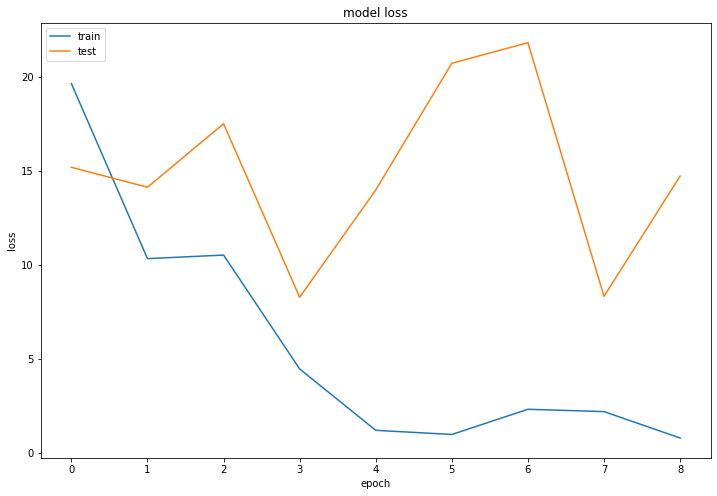

In [48]:
plt.figure(figsize=(12,8))
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

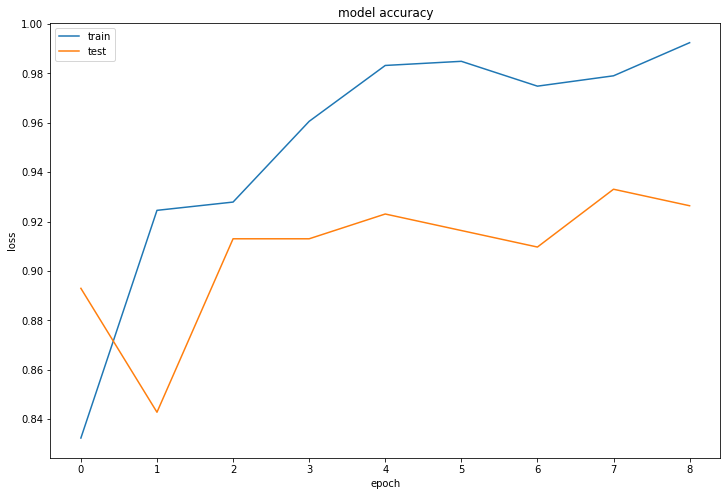

In [50]:
plt.figure(figsize=(12,8))
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
RNN_acc = RNN_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(RNN_acc * 100))

Test Accuracy: 93.750%


In [52]:
y_pred = np.array(list(map(lambda x: np.argmax(x), RNN_model.predict(X_test))))

In [53]:
RNN_cm = confusion_matrix(y_test, y_pred)
RNN_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

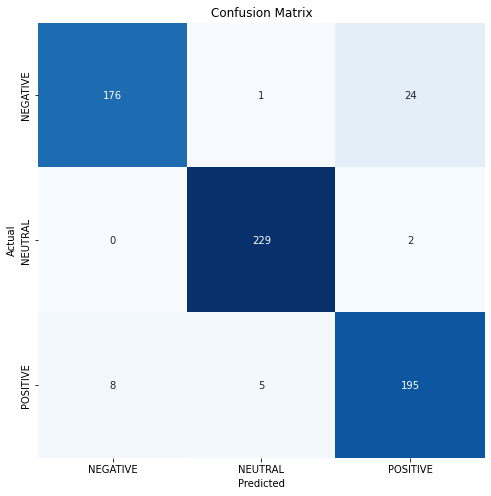

In [54]:
plt.figure(figsize=(8, 8))
sns.heatmap(RNN_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
print("Classification Report:\n----------------------\n", RNN_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.88      0.91       201
     NEUTRAL       0.97      0.99      0.98       231
    POSITIVE       0.88      0.94      0.91       208

    accuracy                           0.94       640
   macro avg       0.94      0.93      0.94       640
weighted avg       0.94      0.94      0.94       640



# GRU

In [56]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

GRU_model = tf.keras.Model(inputs=inputs, outputs=outputs)
GRU_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_4 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_4 (Flatten)         (None, 652288)            0         
                                                                 
 dense_4 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________

In [57]:
GRU_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
history_GRU = GRU_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 7s 137ms/step - loss: 27.6451 - accuracy: 0.7821 - val_loss: 5.9043 - val_accuracy: 0.8595
Epoch 2/50
38/38 [==============================] - 5s 129ms/step - loss: 3.9357 - accuracy: 0.9313 - val_loss: 9.0950 - val_accuracy: 0.8930
Epoch 3/50
38/38 [==============================] - 6s 149ms/step - loss: 3.3344 - accuracy: 0.9455 - val_loss: 2.8755 - val_accuracy: 0.9365
Epoch 4/50
38/38 [==============================] - 6s 156ms/step - loss: 0.9669 - accuracy: 0.9715 - val_loss: 5.0762 - val_accuracy: 0.9331
Epoch 5/50
38/38 [==============================] - 5s 124ms/step - loss: 1.1368 - accuracy: 0.9723 - val_loss: 3.0825 - val_accuracy: 0.9398
Epoch 6/50
38/38 [==============================] - 5s 119ms/step - loss: 1.1952 - accuracy: 0.9715 - val_loss: 46.2420 - val_accuracy: 0.8127
Epoch 7/50
38/38 [==============================] - 5s 125ms/step - loss: 8.4868 - accuracy: 0.9170 - val_loss: 3.6946 - val_accuracy: 0.9599
Epoc

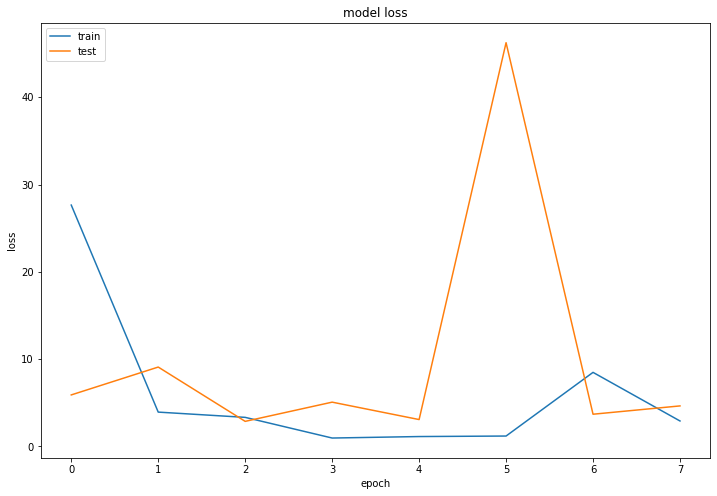

In [59]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

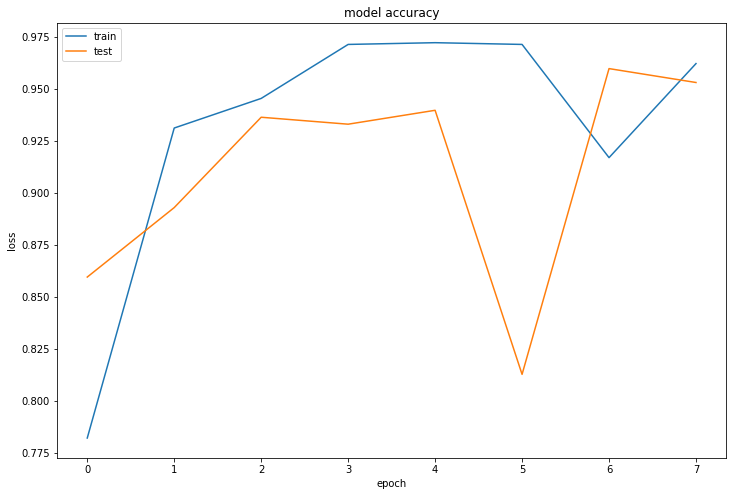

In [60]:
plt.figure(figsize=(12,8))
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
GRU_acc = GRU_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(GRU_acc * 100))

Test Accuracy: 91.719%


In [62]:
y_pred = np.array(list(map(lambda x: np.argmax(x), GRU_model.predict(X_test))))

In [65]:
GRU_cm = confusion_matrix(y_test, y_pred)
GRU_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

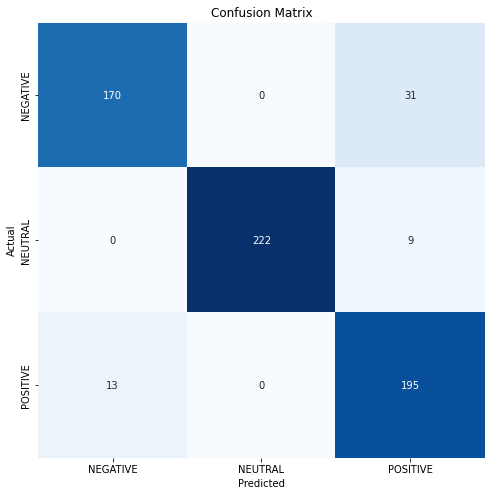

In [64]:
plt.figure(figsize=(8, 8))
sns.heatmap(GRU_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
print("Classification Report:\n----------------------\n", GRU_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.93      0.85      0.89       201
     NEUTRAL       1.00      0.96      0.98       231
    POSITIVE       0.83      0.94      0.88       208

    accuracy                           0.92       640
   macro avg       0.92      0.91      0.92       640
weighted avg       0.92      0.92      0.92       640



# LSTM

In [67]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(lstm)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

LSTM_model = tf.keras.Model(inputs=inputs, outputs=outputs)
LSTM_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_5 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 2548, 256)         264192    
                                                                 
 flatten_5 (Flatten)         (None, 652288)            0         
                                                                 
 dense_5 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,221,059
Trainable params: 2,221,059
Non-trainable params: 0
_________________________________________________

In [68]:
LSTM_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
history_LSTM = LSTM_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 7s 146ms/step - loss: 6.5442 - accuracy: 0.8324 - val_loss: 4.7317 - val_accuracy: 0.8194
Epoch 2/50
38/38 [==============================] - 5s 143ms/step - loss: 1.6358 - accuracy: 0.9355 - val_loss: 1.7285 - val_accuracy: 0.9064
Epoch 3/50
38/38 [==============================] - 6s 161ms/step - loss: 1.1713 - accuracy: 0.9539 - val_loss: 3.6096 - val_accuracy: 0.9164
Epoch 4/50
38/38 [==============================] - 7s 179ms/step - loss: 0.1497 - accuracy: 0.9925 - val_loss: 0.9340 - val_accuracy: 0.9632
Epoch 6/50
38/38 [==============================] - 5s 141ms/step - loss: 0.0653 - accuracy: 0.9941 - val_loss: 2.0903 - val_accuracy: 0.9398
Epoch 7/50
38/38 [==============================] - 6s 152ms/step - loss: 0.2174 - accuracy: 0.9866 - val_loss: 5.8279 - val_accuracy: 0.8863
Epoch 8/50
38/38 [==============================] - 5s 133ms/step - loss: 0.7297 - accuracy: 0.9723 - val_loss: 0.9526 - val_accuracy: 0.9632
Epoch 

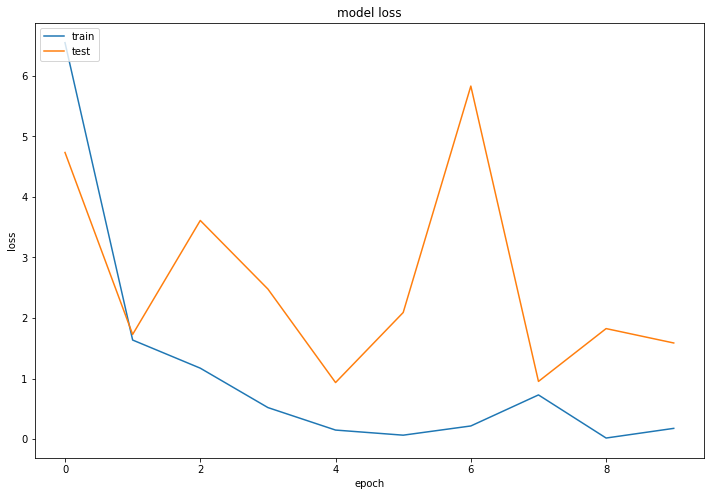

In [70]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

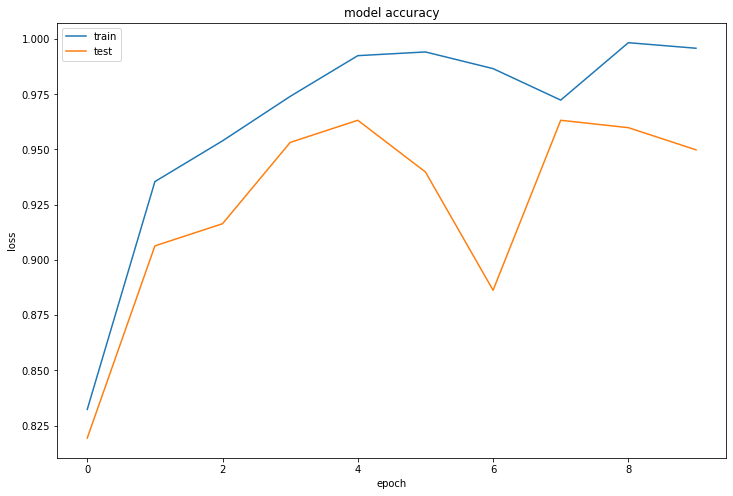

In [71]:
plt.figure(figsize=(12,8))
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
LSTM_acc = LSTM_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(LSTM_acc * 100))

Test Accuracy: 95.938%


In [73]:
y_pred = np.array(list(map(lambda x: np.argmax(x), LSTM_model.predict(X_test))))

In [74]:
LSTM_cm = confusion_matrix(y_test, y_pred)
LSTM_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

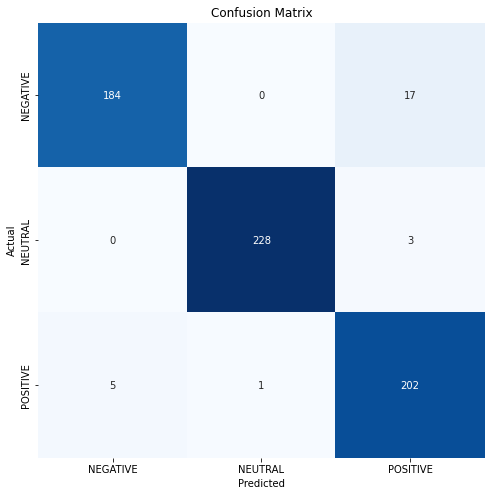

In [75]:
plt.figure(figsize=(8, 8))
sns.heatmap(LSTM_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [76]:
print("Classification Report:\n----------------------\n", LSTM_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.92      0.94       201
     NEUTRAL       1.00      0.99      0.99       231
    POSITIVE       0.91      0.97      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



# MLP

In [97]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
dense1 = tf.keras.layers.Dense(256)(expand_dims)
dense2 = tf.keras.layers.Dense(128)(dense1)
dense3 = tf.keras.layers.Dense(64)(dense2)
flatten = tf.keras.layers.Flatten()(dense3)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

MLP_model = tf.keras.Model(inputs=inputs, outputs=outputs)
MLP_model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 2548)]            0         
                                                                 
 tf.expand_dims_11 (TFOpLamb  (None, 2548, 1)          0         
 da)                                                             
                                                                 
 dense_20 (Dense)            (None, 2548, 256)         512       
                                                                 
 dense_21 (Dense)            (None, 2548, 128)         32896     
                                                                 
 dense_22 (Dense)            (None, 2548, 64)          8256      
                                                                 
 flatten_9 (Flatten)         (None, 163072)            0         
                                                          

In [98]:
MLP_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [99]:
history_MLP = MLP_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 1s 22ms/step - loss: 14298662305792.0000 - accuracy: 0.5096 - val_loss: 14225401446400.0000 - val_accuracy: 0.3344
Epoch 2/50
38/38 [==============================] - 1s 14ms/step - loss: 49058907422720.0000 - accuracy: 0.5113 - val_loss: 22273480196096.0000 - val_accuracy: 0.3445
Epoch 3/50
38/38 [==============================] - 1s 14ms/step - loss: 84466009636864.0000 - accuracy: 0.4937 - val_loss: 52293818908672.0000 - val_accuracy: 0.5686
Epoch 4/50
38/38 [==============================] - 1s 14ms/step - loss: 59935098404864.0000 - accuracy: 0.4828 - val_loss: 196861637951488.0000 - val_accuracy: 0.5418
Epoch 5/50
38/38 [==============================] - 1s 15ms/step - loss: 168327267745792.0000 - accuracy: 0.4602 - val_loss: 214665435021312.0000 - val_accuracy: 0.5418
Epoch 6/50
38/38 [==============================] - 1s 14ms/step - loss: 61069120765952.0000 - accuracy: 0.4845 - val_loss: 62933014937600.0000 - val_accuracy: 0.

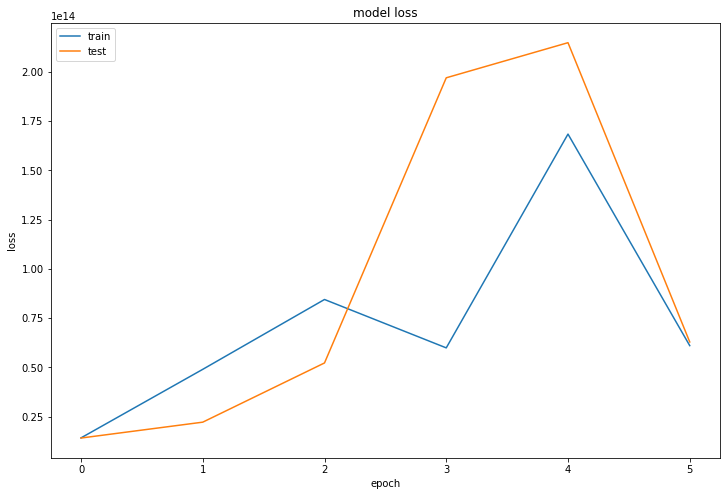

In [100]:
plt.figure(figsize=(12,8))
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

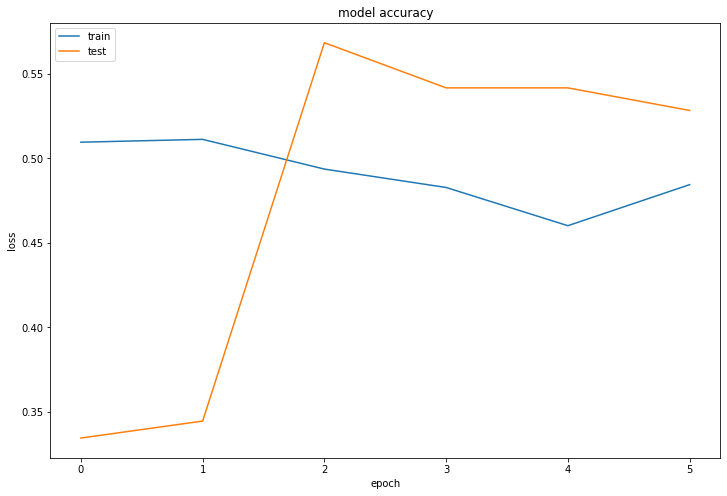

In [101]:
plt.figure(figsize=(12,8))
plt.plot(history_MLP.history['accuracy'])
plt.plot(history_MLP.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
MLP_acc = MLP_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(MLP_acc * 100))

Test Accuracy: 32.500%


In [103]:
y_pred = np.array(list(map(lambda x: np.argmax(x), MLP_model.predict(X_test))))

In [104]:
MLP_cm = confusion_matrix(y_test, y_pred)
MLP_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

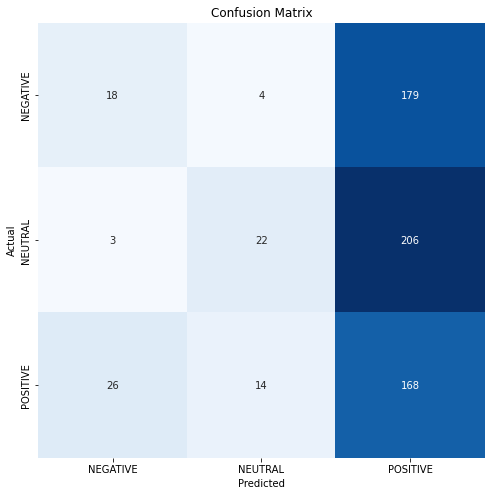

In [105]:
plt.figure(figsize=(8, 8))
sns.heatmap(MLP_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [106]:
print("Classification Report:\n----------------------\n", MLP_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.38      0.09      0.15       201
     NEUTRAL       0.55      0.10      0.16       231
    POSITIVE       0.30      0.81      0.44       208

    accuracy                           0.33       640
   macro avg       0.41      0.33      0.25       640
weighted avg       0.42      0.33      0.25       640



# CNN

In [112]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
cnn1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu',kernel_regularizer='l2')(expand_dims)
cnn2 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn1)
cnn3 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu',kernel_regularizer='l2')(cnn2)
cnn4 = tf.keras.layers.MaxPooling1D(pool_size=2)(cnn3)

flatten = tf.keras.layers.Flatten()(cnn4)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

CNN_model = tf.keras.Model(inputs=inputs, outputs=outputs)
CNN_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 2548)]            0         
                                                                 
 tf.expand_dims_14 (TFOpLamb  (None, 2548, 1)          0         
 da)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 2546, 64)          256       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1273, 64)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 1271, 32)          6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 635, 32)          0  

In [113]:
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [114]:
history_CNN = CNN_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 8s 16ms/step - loss: 10565747474432.0000 - accuracy: 0.4116 - val_loss: 4929540849664.0000 - val_accuracy: 0.4615
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 29548022333440.0000 - accuracy: 0.4954 - val_loss: 42712573149184.0000 - val_accuracy: 0.4247
Epoch 3/50
38/38 [==============================] - 0s 8ms/step - loss: 32724265992192.0000 - accuracy: 0.4971 - val_loss: 26407358955520.0000 - val_accuracy: 0.5050
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: 6307096559616.0000 - accuracy: 0.4795 - val_loss: 9746626117632.0000 - val_accuracy: 0.3445
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 76119973822464.0000 - accuracy: 0.4191 - val_loss: 16204127272960.0000 - val_accuracy: 0.3211
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 53640626700288.0000 - accuracy: 0.4853 - val_loss: 99770269958144.0000 - val_accuracy: 0.3311


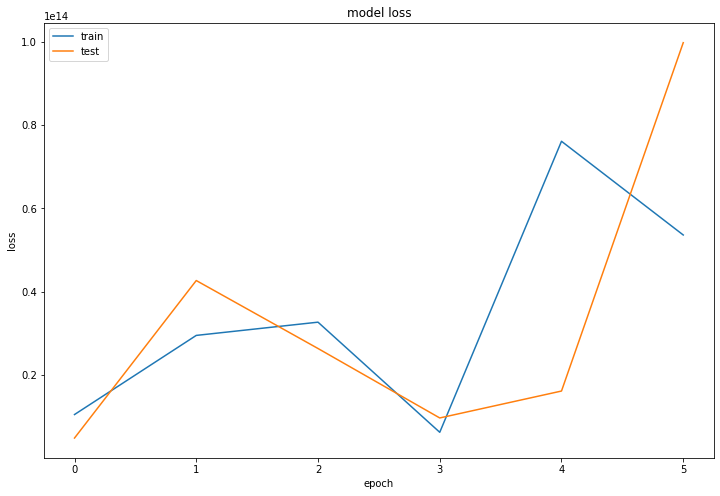

In [115]:
plt.figure(figsize=(12,8))
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

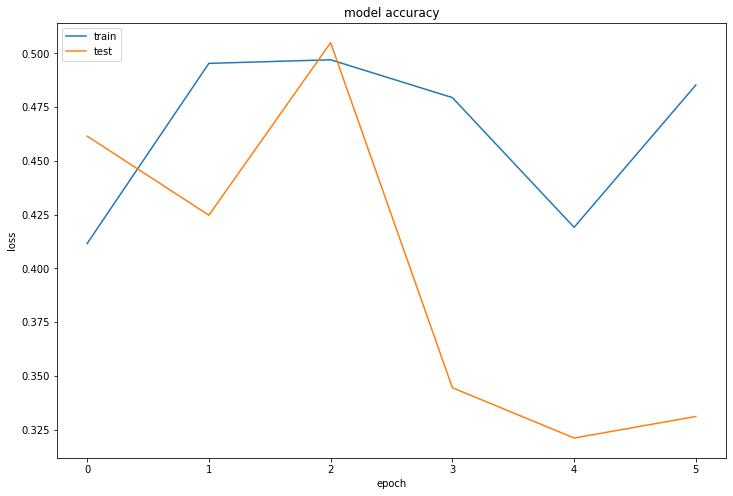

In [116]:
plt.figure(figsize=(12,8))
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
CNN_acc = CNN_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(CNN_acc * 100))

Test Accuracy: 40.781%


In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), CNN_model.predict(X_test))))

In [118]:
CNN_cm = confusion_matrix(y_test, y_pred)
CNN_clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

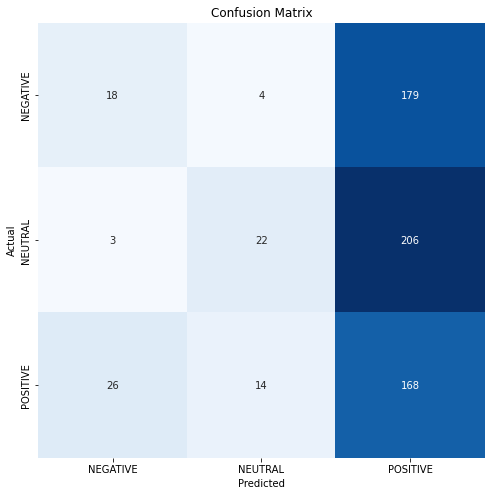

In [119]:
plt.figure(figsize=(8, 8))
sns.heatmap(CNN_cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [120]:
print("Classification Report:\n----------------------\n", CNN_clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.38      0.09      0.15       201
     NEUTRAL       0.55      0.10      0.16       231
    POSITIVE       0.30      0.81      0.44       208

    accuracy                           0.33       640
   macro avg       0.41      0.33      0.25       640
weighted avg       0.42      0.33      0.25       640



#Result Comparision

In [128]:
result={'Mlp': MLP_acc, 'SimpleRNN': RNN_acc, 'GRU': GRU_acc, 'LSTM': LSTM_acc, 'CNN': CNN_acc}

In [129]:
result=pd.DataFrame.from_dict(result,orient='index')

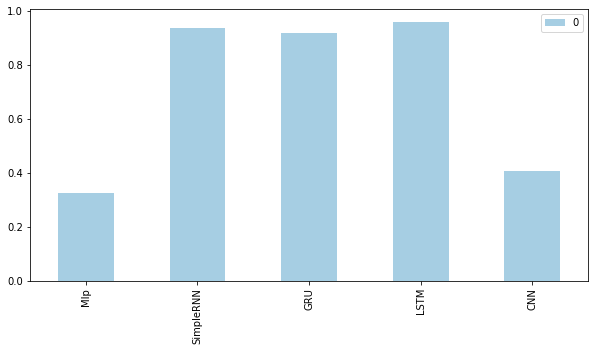

In [135]:
colors = ['red', 'blue', 'green', 'black', 'purple']
result.plot(kind='bar',figsize=(10,5), stacked=True, colormap='Paired')